1)	Which is the most common drug used which caused overdose? 
- Is it more common for a genre to die due to OD?
- Difference between males and females overdoses

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Reading the csv file 
df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv")
df

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,07/22/2017 12:00:00 AM,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,Y,NaN,NaN,NaN,NaN,Y,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

Findings:
- There are lots of columns in this dataframe which are not relevant for the analysis, most of them have a lot of Nans values
- There's a list of drugs used, which is useful for the anlaysis, but it's not market with numbers but with strings
- Object type should be chanegd

In [4]:
#Reading the columns
df.columns

Index(['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican',
       'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
       'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

In [5]:
#Looking at how many unique value in each column
df.nunique()

ID                     5105
Date                   2098
DateType                  2
Age                      65
Sex                       3
Race                     11
ResidenceCity           370
ResidenceCounty          84
ResidenceState           26
DeathCity               222
DeathCounty               9
Location                  6
LocationifOther         322
DescriptionofInjury     320
InjuryPlace              71
InjuryCity              234
InjuryCounty             12
InjuryState               3
COD                    3193
OtherSignifican          92
Heroin                    1
Cocaine                   1
Fentanyl                  4
FentanylAnalogue          1
Oxycodone                 1
Oxymorphone               1
Ethanol                   1
Hydrocodone               1
Benzodiazepine            1
Methadone                 1
Amphet                    1
Tramad                    1
Morphine_NotHeroin        5
Hydromorphone             1
Other                   134
OpiateNOS           

In [6]:
#Drop columns which are not relevant for the analysis
df = df.drop(columns=['ID','Date', 'DateType', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican',
        'Other',
       'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'])

In [7]:
#Replacing Nans Values with 0s
df = df.fillna('0')

In [8]:
df

,Age,Sex,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone
0,0,0,0,0,Y,0,0,0,0,Y,Y,0,0,0,0,0
1,48,Male,0,Y,0,0,0,0,0,0,0,0,0,0,0,0
2,30,Female,Y,Y,0,0,0,0,0,0,0,0,0,0,0,0
3,23,Male,Y,0,Y,0,0,0,0,0,0,0,0,0,0,0
4,22,Male,0,0,Y,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,43,Male,0,0,0,0,0,0,Y,0,Y,0,0,0,0,0
5101,21,Male,Y,0,0,0,0,0,0,0,Y,0,0,0,0,0
5102,30,Male,Y,0,Y,Y,0,0,0,0,0,0,0,Y,0,0
5103,33,Male,0,0,Y,0,0,0,0,0,0,0,0,0,0,0


Drug used are marked with a 'Y', in order to answer to the research question this instances must changed with ones, so that they can be summed up and make other analysis.
Other string have been used to describe the type of drug used, so the same replacement have been done.

In [9]:
L = ['Y', 'Y-A', 'Y POPS', 'Y (PTCH)', 'YES', 'STOLE MEDS','NO RX BUT STRAWS','PCP NEG']
for s in L:
    df = df.replace(s, "1")

In [10]:
#Checking the types
df.dtypes

Age                   object
Sex                   object
Heroin                object
Cocaine               object
Fentanyl              object
FentanylAnalogue      object
Oxycodone             object
Oxymorphone           object
Ethanol               object
Hydrocodone           object
Benzodiazepine        object
Methadone             object
Amphet                object
Tramad                object
Morphine_NotHeroin    object
Hydromorphone         object
dtype: object

In [11]:
#Converting object type to int
drugs = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone']
for d in drugs:
    df[d] = df[d].astype(int)

In [12]:
#Checking results
df.dtypes

Age                   object
Sex                   object
Heroin                 int64
Cocaine                int64
Fentanyl               int64
FentanylAnalogue       int64
Oxycodone              int64
Oxymorphone            int64
Ethanol                int64
Hydrocodone            int64
Benzodiazepine         int64
Methadone              int64
Amphet                 int64
Tramad                 int64
Morphine_NotHeroin     int64
Hydromorphone          int64
dtype: object

In [13]:
df.sum()

Sex                   0MaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFem...
Heroin                                                             2529
Cocaine                                                            1521
Fentanyl                                                           2232
FentanylAnalogue                                                    389
Oxycodone                                                           607
Oxymorphone                                                         108
Ethanol                                                            1247
Hydrocodone                                                         118
Benzodiazepine                                                     1343
Methadone                                                           474
Amphet                                                              159
Tramad                                                              130
Morphine_NotHeroin                                              

From this table we can see that Heorin is the first drug which caused overdose, followed by Fentanyl and Cocaine. While other drugs such as Hydromorphone and Morphine are the least drug used that caused overdose

Continuing with the analysis now we can look if different gender use the same drug or not

In [14]:
df_sex = df.groupby('Sex').sum()
df_sex

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone
Sex,,,,,,,,,,,,,,
0,1,2,5,1,0,0,2,1,2,0,0,0,0,0
Female,539,381,467,82,204,35,274,55,463,159,48,46,18,9
Male,1989,1138,1760,306,402,73,971,62,878,314,111,83,24,15
Unknown,0,0,0,0,1,0,0,0,0,1,0,1,0,1


From this table we can see that males overdoses cases are much higher than female. So it is more common for males to die of overdoses than females.

Continuing with the analysis, now we look at the two differend genders separately.

In [20]:
#Creating two different datafram in order to plot based on gender
df_male = df_sex.loc[df_sex.index == 'Male']
df_female = df_sex.loc[df_sex.index == 'Female']

<AxesSubplot:>

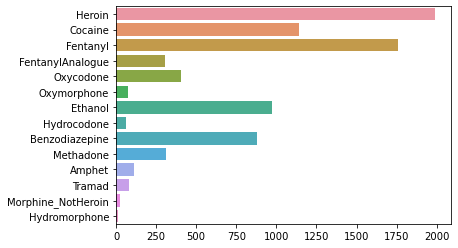

In [22]:
#Plotting male dataset
sns.barplot(data=df_male, orient='h')

From this plot the first drug used that caused overdose are Heroin, Fentanyl and Cocaine

<AxesSubplot:>

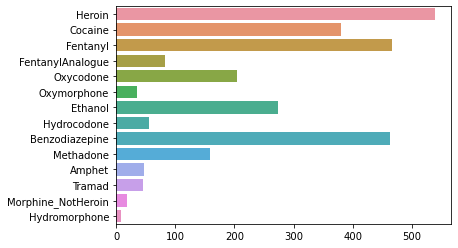

In [23]:
#Plotting female dataset
sns.barplot(data=df_female, orient='h')

From this plot the first drug used that caused overdose are Heroin, Fentanyl and Benzodiazepine, followed by Cocaine

So answering to the research question, yes there are differences between males and females on the drug used. As we can see female use more Benzodiazepine, while males use more Cocaine